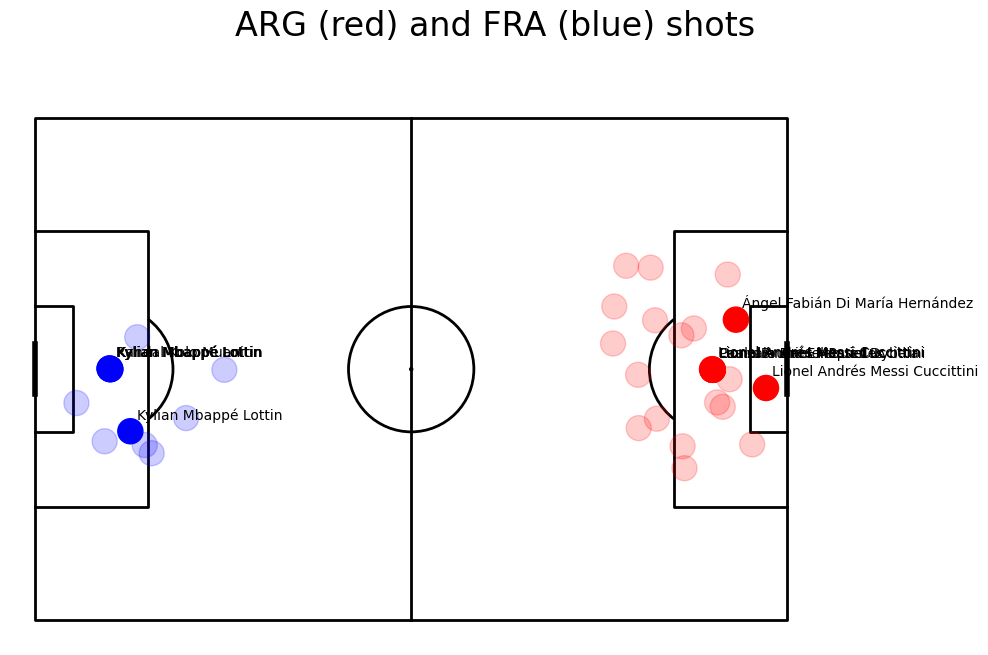

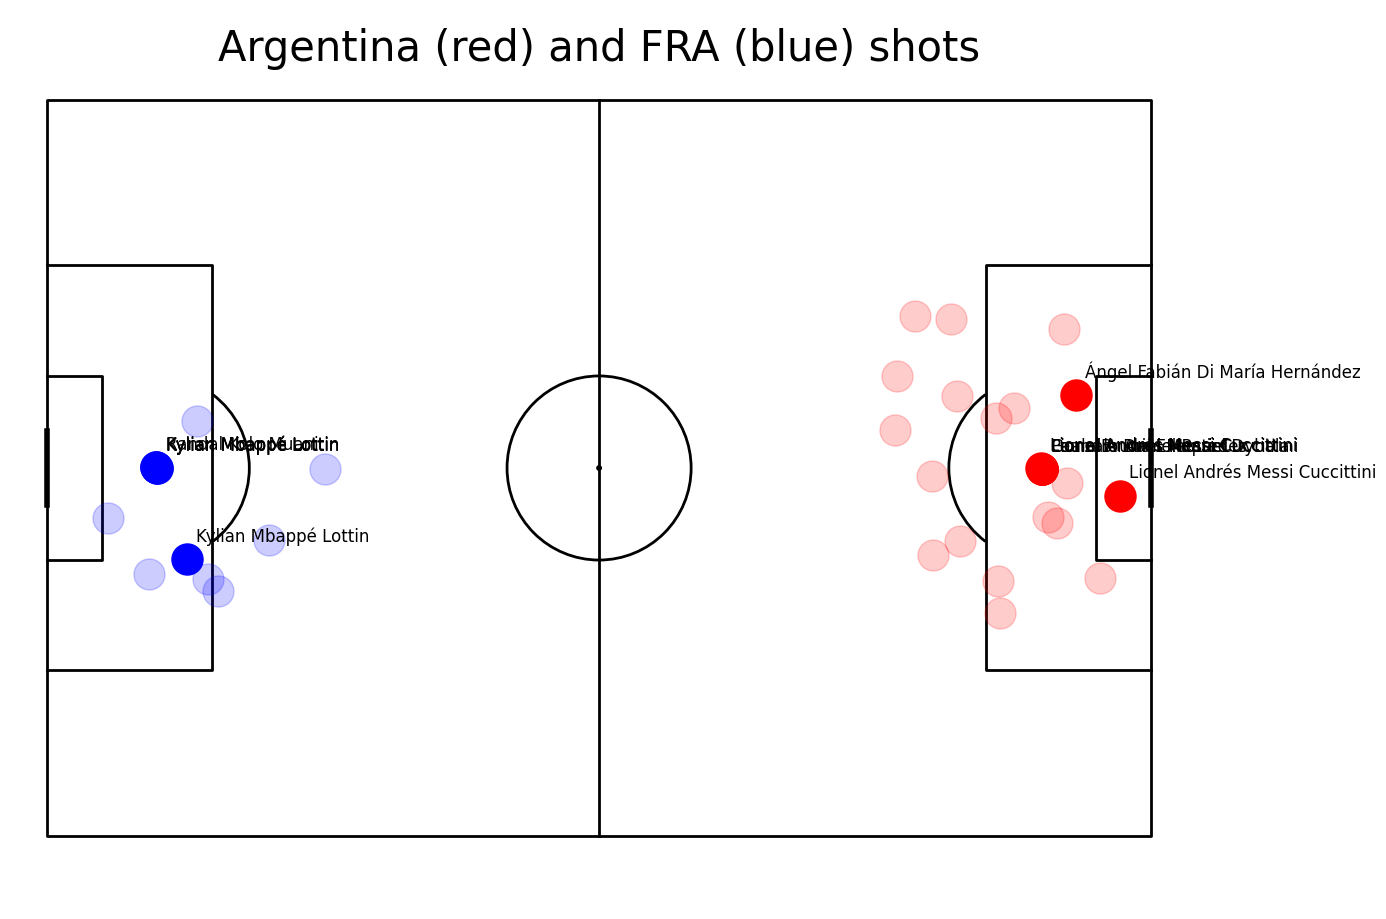

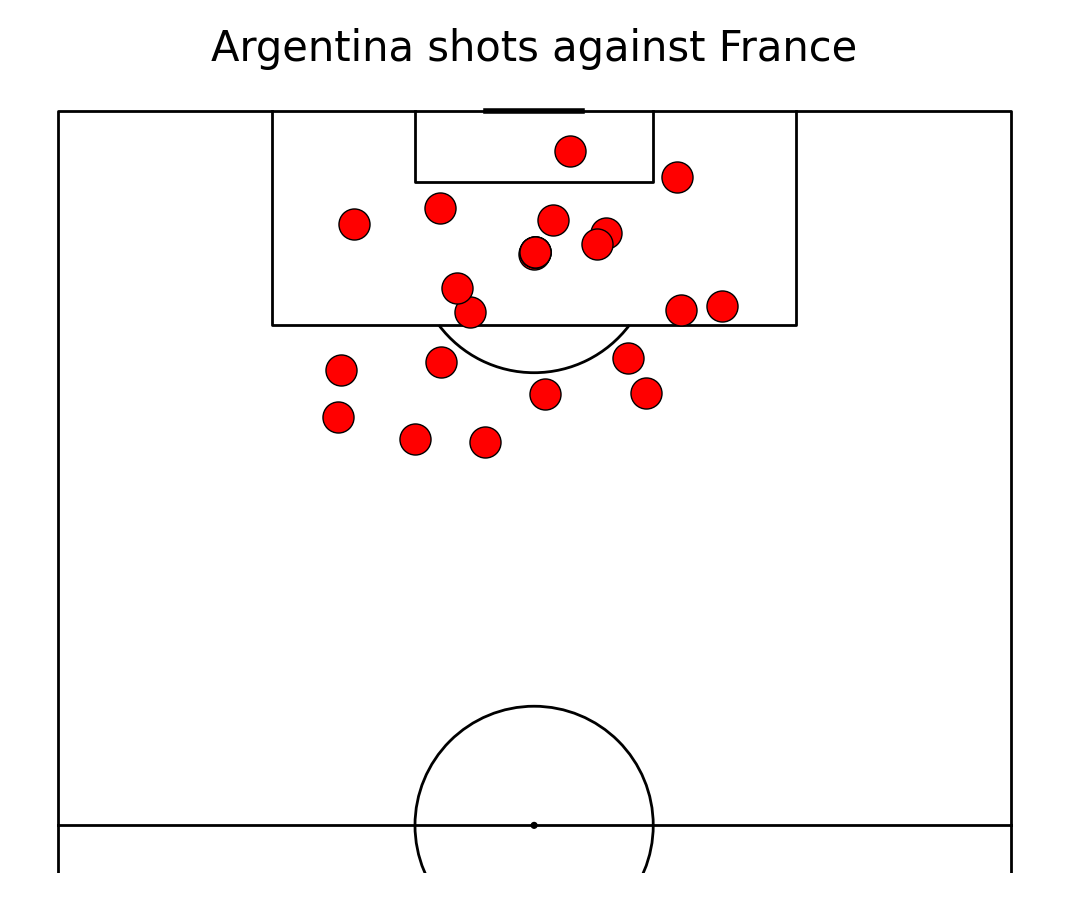

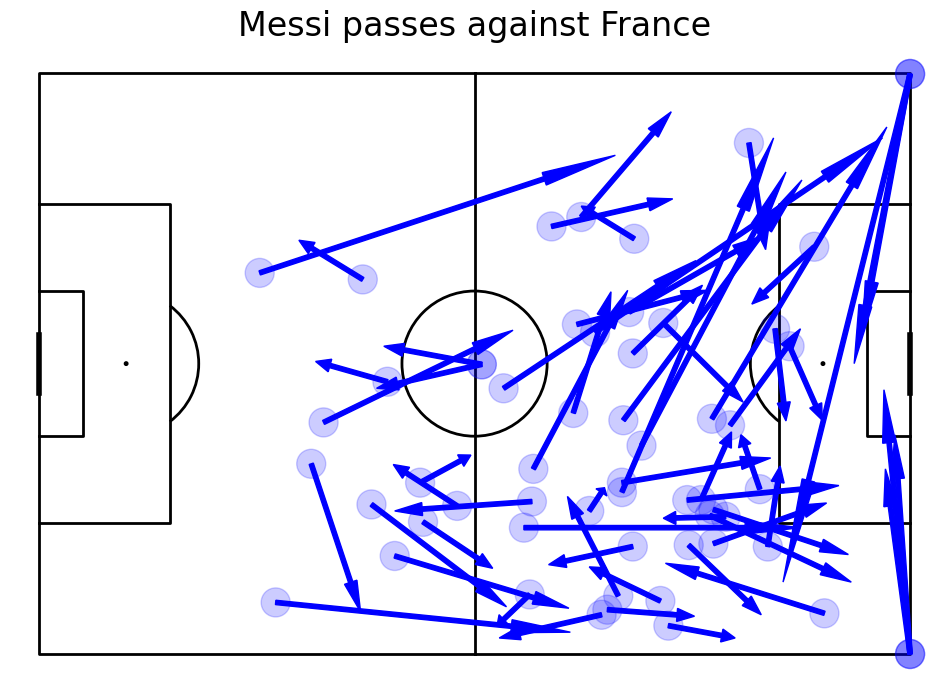

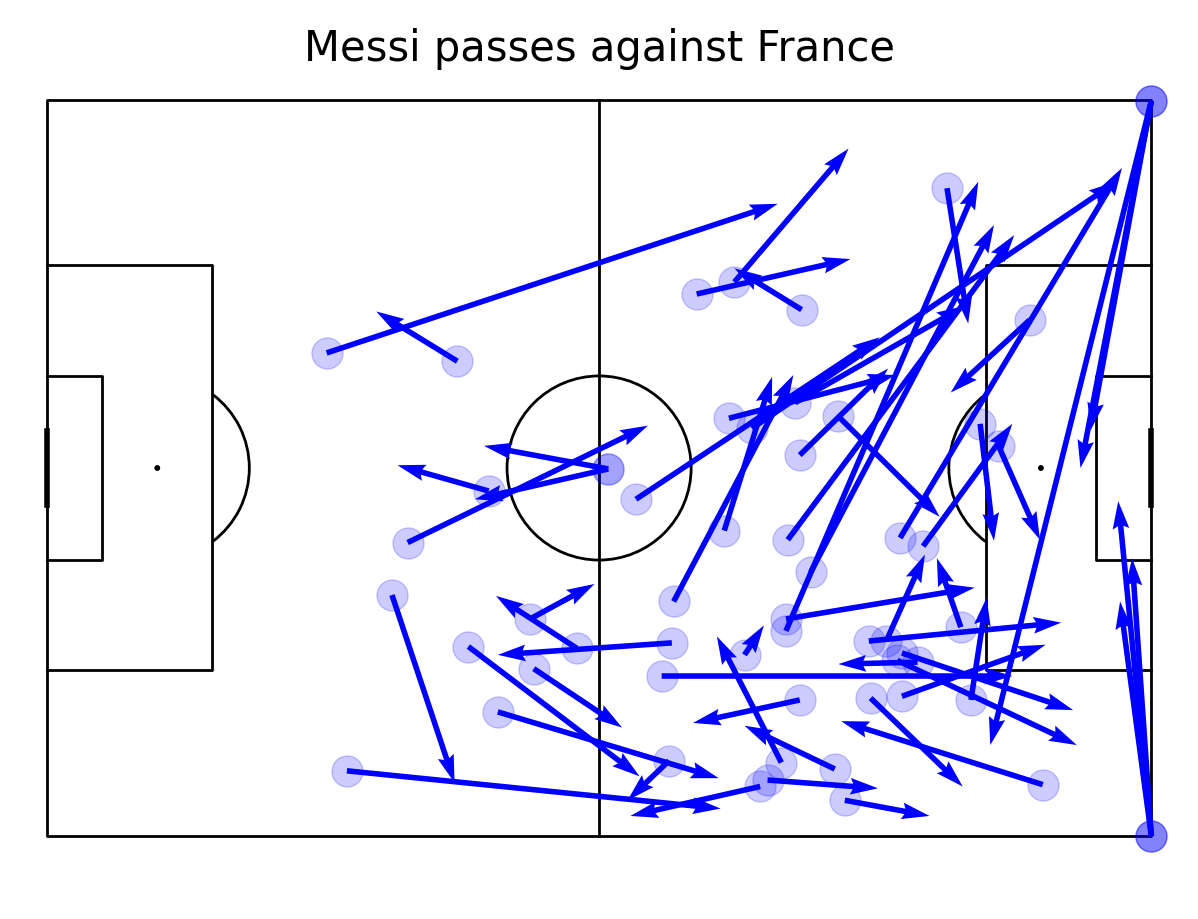

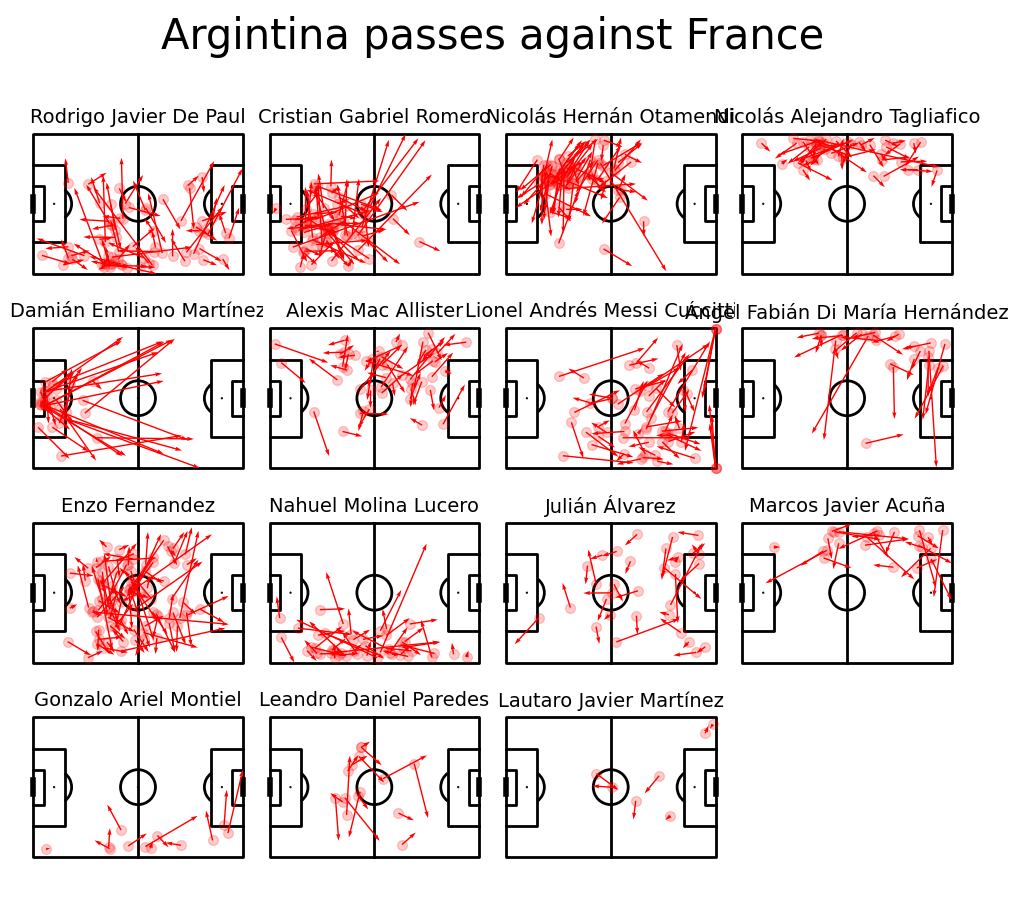

In [1]:


import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

##############################################################################
# Opening the dataset
# ----------------------------
# The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.

parser = Sbopen()
df, related, freeze, tactics = parser.event(3869685)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
#the data frame is what contains all of the events , i want to pick all of the shots 
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    

pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information 
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("ARG (red) and FRA (blue) shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()


#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_ARG = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_ARG = df.loc[mask_ARG, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_ARG.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle 
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch']) 
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch']) 
       
mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]   

#for FRAnce we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch']) 
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else: 
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch']) 
       
fig.suptitle("Argentina (red) and FRA (blue) shots", fontsize = 30)           
plt.show()


pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_ARG.x, df_ARG.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black") 
fig.suptitle("Argentina shots against France", fontsize = 30)           
plt.show()




#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

##############################################################################
#

parser = Sbopen()
df, related, freeze, tactics = parser.event(3869685)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')



#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Lionel Andrés Messi Cuccittini':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)

ax.set_title("Messi passes against France", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

##############################################################################

mask_Messi = (df.type_name == 'Pass') & (df.player_name == "Lionel Andrés Messi Cuccittini")
df_pass = df.loc[mask_Messi, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Messi passes against France", fontsize = 30) 
plt.show()


#prepare the dataframe of passes by England that were no-throw ins
mask_ARG = (df.type_name == 'Pass') & (df.team_name == "Argentina") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_ARG, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "Red", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "Red", ax=ax, width=1)
    
#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
    
#Another way to set title using mplsoccer 
axs['title'].text(0.5, 0.5, 'Argintina passes against France', ha='center', va='center', fontsize=30)
plt.show()

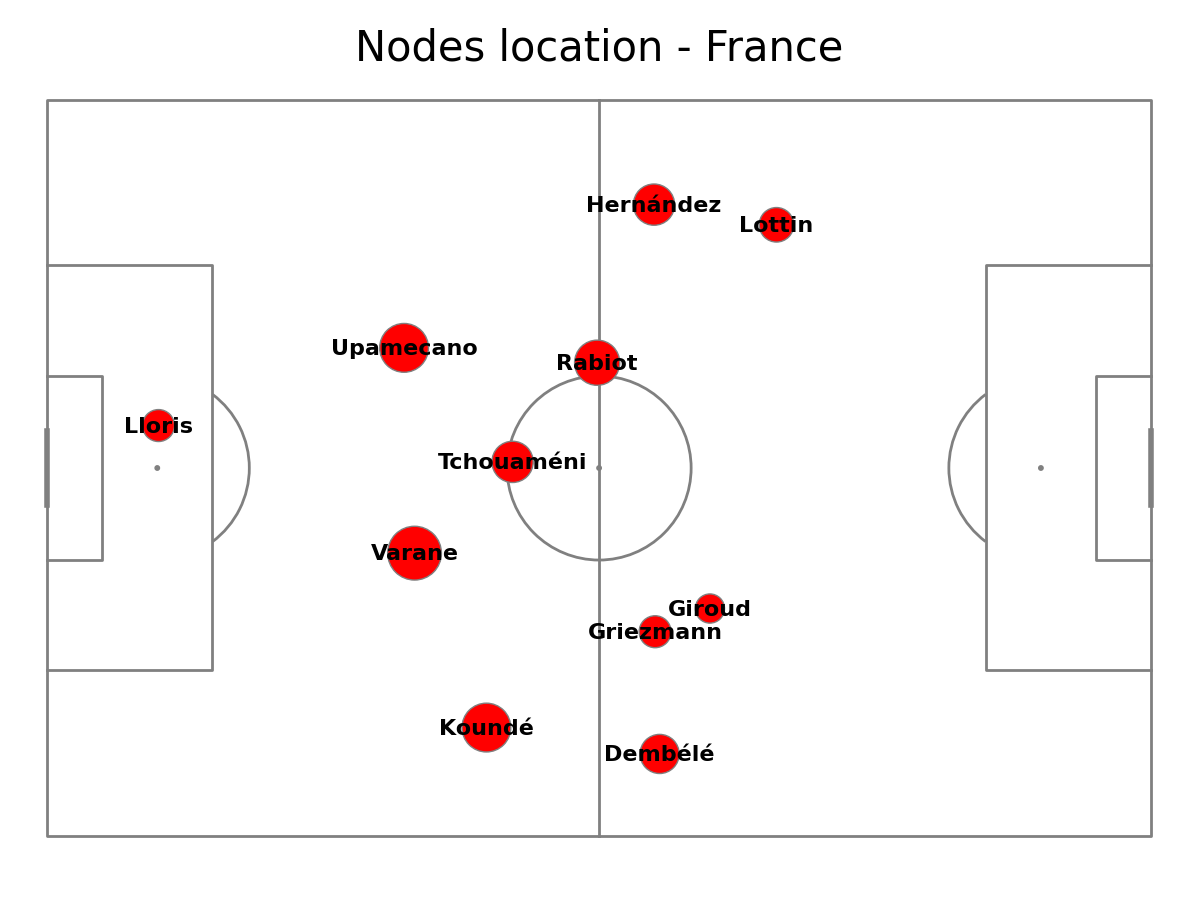

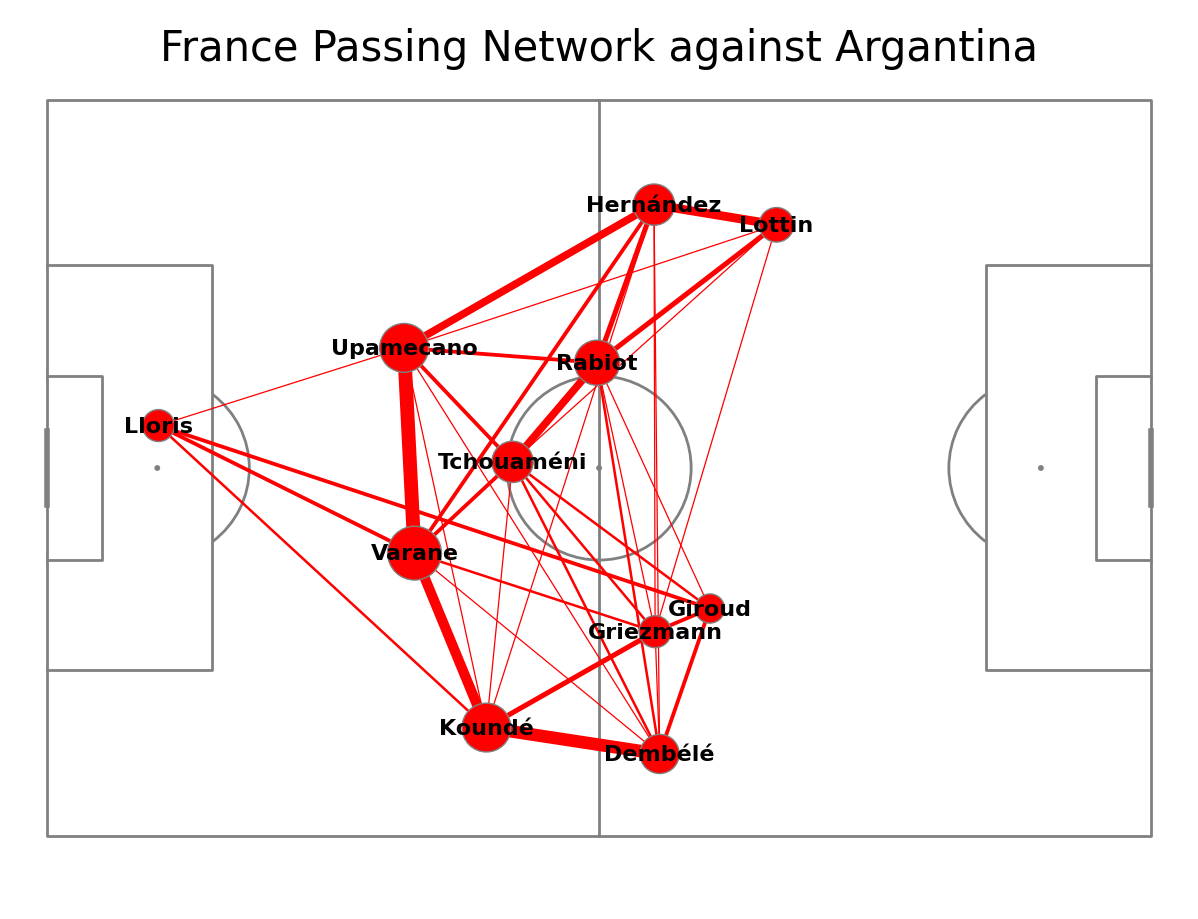

Centralisation index is  0.07


In [2]:


##############################################################################
# Start with the necessary imports.

import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd 

##############################################################################
# Opening the dataset
# ----------------------------
# The event data is stored in a dataframe *df* as usual.

parser = Sbopen()
df, related, freeze, tactics = parser.event(3869685)

##############################################################################
# Preparing the data
# ----------------------------
# For passing networks we use only accurate/successful passes made by a team until the first substitution.
# This is mainly just to get going and there are several possible variations of this.
# We need information about pass start and end location as well as player who made and received the pass. 
# To make the vizualisation clearer, we annotate the players using their surname.
# (This works for English women side, since players' surnames  are single-barrelled. But
# can cause problems.For example, Leo Messi's name in Statsbomb is Lionel Andrés Messi Cuccittini. So the
# name Cuccittini will come up if you run this code on his matches!).

#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "France"].iloc[0]["index"]
#make df with successfull passes by England until the first substitution
mask_FRA = (df.type_name == 'Pass') & (df.team_name == "France") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[mask_FRA, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

##############################################################################
# Calculating vertices size and location
# ----------------------------
# To calculate vertices size and location, first we create an empty dataframe.
# For each player we calculate average location of passes made and receptions.
# Then, we calculate number of passes made by each player.
# As the last step, we calculate set he marker size to be proportional to number of passes.

scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes 
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

##############################################################################
# Calculating edges width
# ----------------------------
# To calculate edge width we again look at the number of passes between players
# We need to group the dataframe of passes by the combination of passer and recipient and count passes between them.
# As the last step, we set the threshold ignoring players that made fewer than 2 passes.
# You can try different thresholds and investigate how the passing network changes when you change it.
# It is recommended that you tune this depedning on the message behind your visualisation.

#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>0]

##############################################################################
# Plotting vertices
# ----------------------------
# Lets first plot the vertices (players) using the *scatter_df* we created previously
# As the next step, we annotate player's surname   .      
        
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - France", fontsize = 30)
plt.show()
##############################################################################
# Plotting edges
# ----------------------------
# For each combination of players who made passes, we make a query to *scatter_df* to get the start and end of the line.
# Then we adjust the line width so that the more passes between players, the wider the line.
# As the next step, we plot the lines on the pitch. It is recommended that zorder of edges is lower than zorder of vertices.
# In the end, we make the title.

#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    
for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("France Passing Network against Argantina", fontsize = 30)
plt.show()

##############################################################################
# Centralisation
# ----------------------------
# To calculate the centralisation index we need to calculate number of passes made by each player. 
# Then, we calculate the denominator - the sum of all passes multiplied by (number of players - 1) -> 10
# To calculate the numerator we sum the difference between maximal number of successful passes by 1 player
# and number of successful passes by each player. We calculate the index dividing the numerator by denominator.

#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max() 
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum() 
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)
